# Test New Features and Random Forest w/out Normalization, OHE
This notebook is for three seperate things Sasha is working on on Morning of Tuesday June 9th

The first thing is run decision tree and then random forest w/out normalization or one hot encoding, make sure I get same numbers, visualize

Then widen grid search for rf, possible that with more features we want a deeper tree than what we did in hw

Then engineer some new features from demographics data

## Load in data, run make officer DF

In [71]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sys
import os
sys.path.insert(0, os.path.abspath("../pipeline"))
import Make_By_Officer_DF as make_officer_df
import Feat_Engineering as feat_engineering_helpers
import Run_Model as run_model
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
t1 = (2012, 2014)
t2 = (2015, 2015)
additional_cont_feat, final_df = make_officer_df.make_df(t1, t2)


In [81]:
pd.set_option("display.max_rows", 100)
final_df.isna().sum().head(100)

target_use_of_force                                                  0
target_drug                                                          0
target_racial                                                        0
target_sustained                                                     0
target_nonviolent                                                    0
target_other                                                         0
Pcnt Complaints Against ASIAN/PACIFIC ISLANDER                    1389
Pcnt Complaints Against BLACK                                     1389
Pcnt Complaints Against HISPANIC                                  1389
Pcnt Complaints Against NATIVE AMERICAN/ALASKAN NATIVE            1389
Pcnt Complaints Against WHITE                                     1389
Pcnt Complaints Against FEMALE                                    1264
Pcnt Complaints Against MALE                                      1264
average_salary                                                     104
salary

In [82]:
cont_feat = ["birth_year", "start_date_timestamp"]
cont_feat.extend(additional_cont_feat)
cat_feat = ["gender", "race", "cleaned_rank"]
desired_targets = ['target_use_of_force', 'target_drug', 'target_racial',
                   'target_sustained', 'target_nonviolent']
target_col = "any_known_complaint"
feat_engineering_helpers.make_target_col(final_df, desired_targets, target_col)

In [83]:
cont_feat

['birth_year',
 'start_date_timestamp',
 'Pcnt Complaints Against ASIAN/PACIFIC ISLANDER',
 'Pcnt Complaints Against BLACK',
 'Pcnt Complaints Against HISPANIC',
 'Pcnt Complaints Against NATIVE AMERICAN/ALASKAN NATIVE',
 'Pcnt Complaints Against WHITE',
 'Pcnt Complaints Against FEMALE',
 'Pcnt Complaints Against MALE',
 'average_salary',
 'salary_change',
 'settlement',
 'trr_total',
 'Active Resister - Chemical',
 'Active Resister - Firearm',
 'Active Resister - Impact Weapon',
 'Active Resister - Other',
 'Active Resister - Other Force',
 'Active Resister - Physical Force - Direct Mechanical',
 'Active Resister - Physical Force - Holding',
 'Active Resister - Physical Force - Stunning',
 'Active Resister - Taser',
 'Active Resister - Taser Display',
 'Assailant Assault/Battery - Chemical',
 'Assailant Assault/Battery - Firearm',
 'Assailant Assault/Battery - Impact Weapon',
 'Assailant Assault/Battery - Other',
 'Assailant Assault/Battery - Other Force',
 'Assailant Assault/Battery

best  DecisionTree  metrics:
{'precision': 0.24858757062146894, 'recall': 0.21674876847290642, 'f1-score': 0.2315789473684211, 'support': 203}


'fixed val threshold metrics: '

,precision,recall,balanced_accuracy
Cutoff,,,
0.00000,0.195349,0.413793,0.566474
0.00001,0.195349,0.413793,0.566474
0.01000,0.195349,0.413793,0.566474
0.05000,0.195349,0.413793,0.566474
0.10000,0.195349,0.413793,0.566474
0.20000,0.197101,0.334975,0.555069
0.50000,0.248588,0.216749,0.554397
0.70000,0.246032,0.152709,0.537799
0.90000,0.275000,0.108374,0.530648


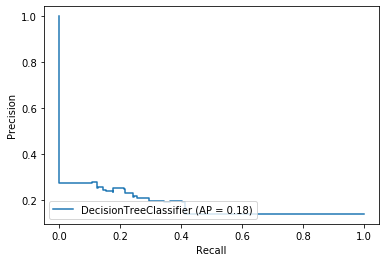

In [92]:
dt, dt_labels =  run_model.single_model(final_df, "DecisionTree", 
                                          target_col, cont_feat, cat_feat, "balanced_accuracy")

In [93]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=35, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

## Side Quest: fix bug in make_officer_df that returns 14.7 sustained complaints from t1

In [ ]:
final_df["count_sustained"].sum()


In [ ]:
final_df["count_sustained"].describe()

In [ ]:
final_df[final_df["count_sustained"]>5]

In [ ]:
complaints_t1, complaints_t2 = make_officer_df.get_relevant_complaints(t1, t2)


Code to get sustained complaints current in buggy maker officer df

In [ ]:
complaints_t1["count_sustained"] = \
    (complaints_t1["final_outcome"].str.lower().str.contains("no action taken") == False) & \
    (complaints_t1["final_outcome"].str.lower().str.contains("unknown") == False) & \
    (complaints_t1["final_outcome"].isna() == False)

In [ ]:
complaints_t1[complaints_t1["count_sustained"] == True].groupby("final_outcome").size().sort_values(ascending= False)

In [ ]:
complaints_t1.groupby("final_outcome").size().sort_values(ascending=False)[:5]

In [ ]:
complaints_t1["final_outcome"].str.lower().str.contains("no action taken").sum()

## Back to tree

In [94]:
dt_labels.remove(target_col)

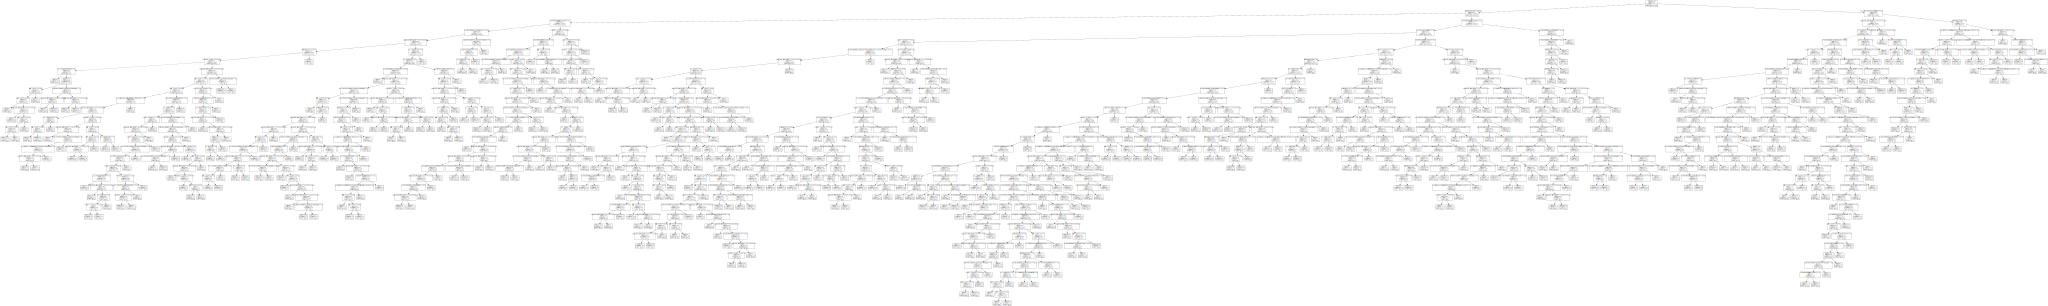

In [95]:
run_model.visualize_tree(dt, dt_labels)

## Try a Random Forest Classifier

best  RandomForest  metrics:
{'precision': 0.29357798165137616, 'recall': 0.15763546798029557, 'f1-score': 0.20512820512820512, 'support': 203}


'fixed val threshold metrics: '

,precision,recall,balanced_accuracy
Cutoff,,,
0.00000,0.141463,1.000000,0.500000
0.00001,0.141463,1.000000,0.500000
0.01000,0.141463,1.000000,0.500000
0.05000,0.144080,0.995074,0.510524
0.10000,0.155309,0.965517,0.550129
0.20000,0.196952,0.827586,0.635790
0.50000,0.293578,0.157635,0.547568
0.70000,0.062500,0.004926,0.496375
0.90000,0.000000,0.000000,0.500000


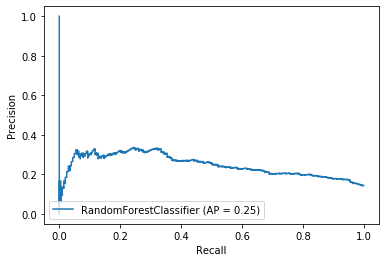

In [96]:
rf, rf_labels =  run_model.single_model(final_df, "RandomForest", 
                                          target_col, cont_feat, cat_feat, "balanced_accuracy")

In [100]:
rf_feature_labels = list(rf_labels)
rf_feature_labels.remove(target_col)

In [105]:
rf_features = pd.DataFrame(index = rf_feature_labels, 
                           data= rf.feature_importances_).sort_values(by=0, ascending=False)

In [106]:
rf_features

,0
start_date_timestamp,0.101190
birth_year,0.087950
average_salary,0.060150
Pcnt Complaints Against FEMALE,0.056752
salary_change,0.056469
Pcnt Complaints Against MALE,0.056070
Other/Unknown,0.052107
Passive Resister - Other,0.044754
trr_total,0.041255
Active Resister - Physical Force - Stunning,0.040428


Next steps: try with less deep tree, rank/salary are probably quite closely related so maybe we don't need both

best  RandomForest  metrics:
{'precision': 0.2529832935560859, 'recall': 0.5221674876847291, 'f1-score': 0.34083601286173637, 'support': 203}


'fixed val threshold metrics: '

,precision,recall,balanced_accuracy
Cutoff,,,
0.00000,0.141463,1.000000,0.500000
0.00001,0.141463,1.000000,0.500000
0.01000,0.141463,1.000000,0.500000
0.05000,0.141463,1.000000,0.500000
0.10000,0.141562,1.000000,0.500406
0.20000,0.146076,0.990148,0.518207
0.50000,0.252983,0.522167,0.634055
0.70000,0.437500,0.034483,0.513589
0.90000,0.000000,0.000000,0.500000


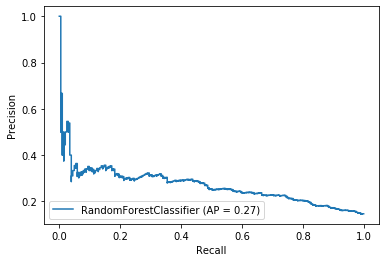

In [107]:
rf2, rf_labels2 =  run_model.single_model(final_df, "RandomForest", 
                                          target_col, cont_feat, cat_feat, "balanced_accuracy")

In [108]:
rf2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

best  RandomForest  metrics:
{'precision': 0.23529411764705882, 'recall': 0.6108374384236454, 'f1-score': 0.3397260273972603, 'support': 203}


'fixed val threshold metrics: '

,precision,recall,balanced_accuracy
Cutoff,,,
0.00000,0.141463,1.000000,0.500000
0.00001,0.141463,1.000000,0.500000
0.01000,0.141463,1.000000,0.500000
0.05000,0.141463,1.000000,0.500000
0.10000,0.141463,1.000000,0.500000
0.20000,0.141463,1.000000,0.500000
0.30000,0.145126,0.990148,0.514554
0.40000,0.182540,0.906404,0.618786
0.50000,0.235294,0.610837,0.641864


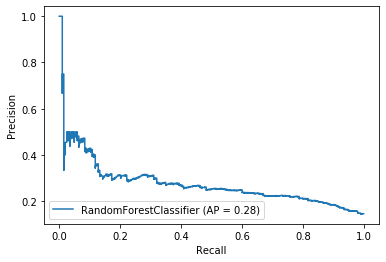

In [109]:
rf3, rf_labels3 =  run_model.single_model(final_df, "RandomForest", 
                                          target_col, cont_feat, cat_feat, "balanced_accuracy")

In [110]:
rf3

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [111]:
rf_features3 = pd.DataFrame(index = rf_feature_labels, 
                           data= rf3.feature_importances_).sort_values(by=0, ascending=False)

In [112]:
rf_features3

,0
Pcnt Complaints Against FEMALE,0.097177
Pcnt Complaints Against MALE,0.083696
start_date_timestamp,0.075799
birth_year,0.071989
Passive Resister - Other,0.062211
Active Resister - Physical Force - Stunning,0.059325
Other/Unknown,0.058916
trr_total,0.056697
average_salary,0.056389
salary_change,0.049595


Limit some features

In [ ]:
cat_feat.remove("cleaned_rank")